## Analysis of Yelp Dataset 2

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1
The csv file named `Yelp_Portfolio2_Input.csv` is provided. You may need to use the Pandas method, i.e., `read_csv`, for doing this. After that, please import the csv file and print out its total length.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [8]:
sample_data = pd.read_csv('Yelp_Portfolio2_Input.csv')
print(len(sample_data))

38654


In [9]:
sample_data.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Middle Eastern; Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Tattoo; Beauty & Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Tires; Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Sushi Bars; Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Arts & Entertainment; Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


# `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

In [10]:
NumCategories = len(sample_data['business_categories'].unique())

In [11]:
print(f'There are {NumCategories} unique business categories in the dataset')


There are 693 unique business categories in the dataset


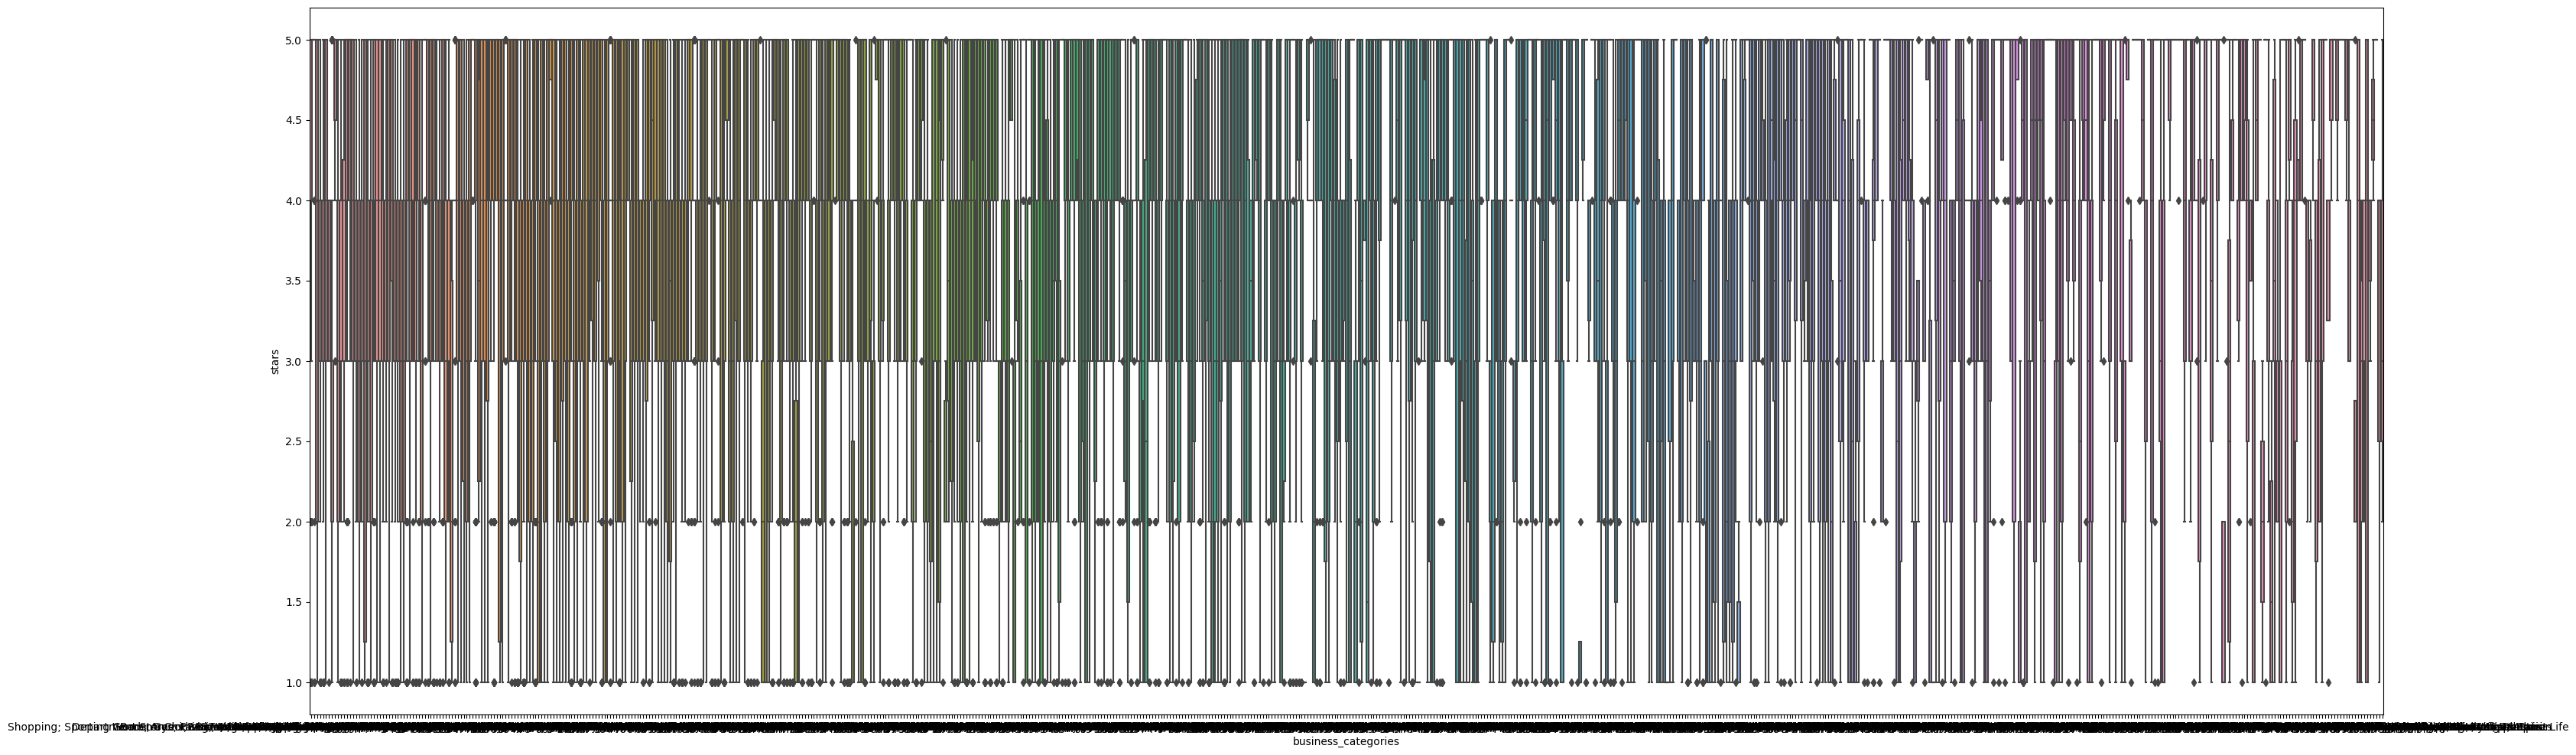

In [12]:
fig, ax = plt.subplots(figsize=(35, 12))
sns.boxplot(x='business_categories', y='stars', data= sample_data)
plt.show()

Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

In [53]:
majorCategories = sample_data['business_categories'].str.split(';').str[-1]
majorCategories = sample_data['business_categories'].str.rsplit(' ').str[-1]
majorCategories = pd.Series(majorCategories)
majorCategories

0        Restaurants
1               Spas
2         Automotive
3        Restaurants
4             Cinema
            ...     
38649    Restaurants
38650    Restaurants
38651    Restaurants
38652    Restaurants
38653    Restaurants
Name: business_categories, Length: 38654, dtype: object

In [54]:
majorCategoriesS = pd.DataFrame({'categories': pd.Series(majorCategories), 'stars': sample_data['stars']})

In [55]:
NumCategories = len(majorCategoriesS['categories'].unique())
NumCategories

139

distribution of the stars for each business category

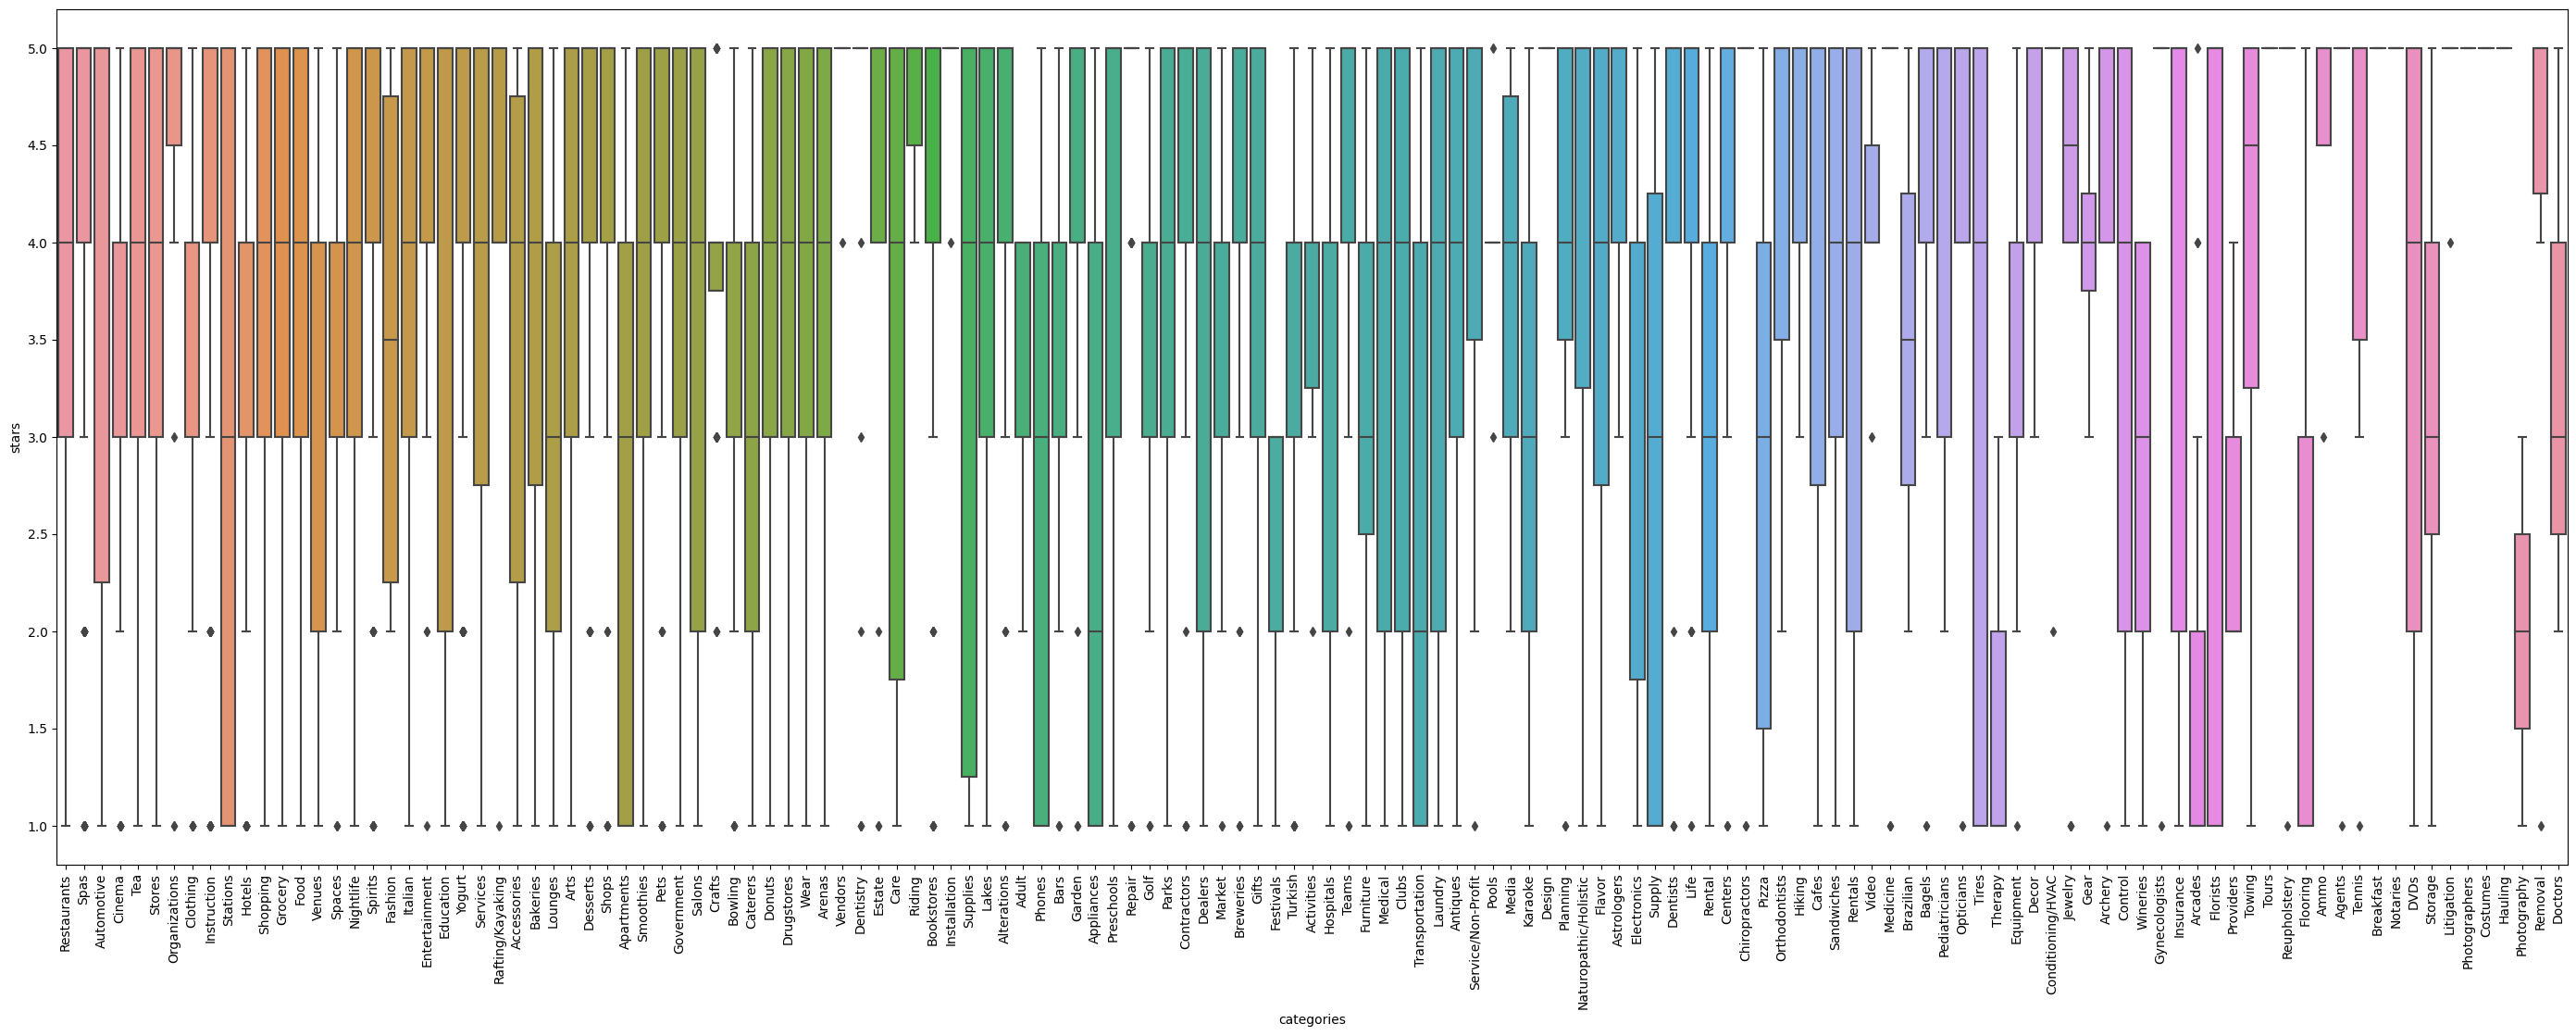

In [56]:
fig, ax = plt.subplots(figsize=(35, 12))
sns.boxplot(x='categories', y='stars', data=majorCategoriesS)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

###  How to efficiently and accurately extract the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN')? and replace the original string with this last category value. At last, print the first five rows.

In [145]:
sampleData = sample_data.copy()

In [146]:
majorCats = sample_data['business_categories'].str.split(';').str[-1]

In [147]:
majorCats = sample_data['business_categories'].str.rsplit(' ').str[-1]

In [148]:
majorCats = pd.Series(majorCats)

In [149]:
sampleData['business_categories'] = majorCats
sampleData.head()

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g


In [150]:
print(f'length of data is {len(sampleData)}')

length of data is 38654


In [151]:
NumUniqueCategories = len(majorCategoriesS['categories'].unique())
NumUniqueCategories

139

###  Let's first check how many unique business categories are present in the dataset. Maybe it's still not an appropriate number to make a clear Boxplot. Now, we want to display `ALL Rows` of the business category count data. That is to count and print the number of occurrences for each business category.

In [182]:
NumCategories = len(sampleData['business_categories'].unique())
print(f'There are {NumCategories} unique business categories in this dataset')

There are 139 unique business categories in this dataset


In [183]:
categoryCounts = sampleData['business_categories'].value_counts()
pd.set_option('display.max_rows', len(categoryCounts))
sum(categoryCounts)


38654

In [187]:
print('number of occurences of each business in the dataset')
categoryCounts

number of occurences of each business in the dataset


Restaurants              25212
Tea                       1116
Shopping                  1099
Italian                    960
Yogurt                     728
Hotels                     528
Spas                       498
Stores                     451
Nightlife                  399
Services                   396
Grocery                    390
Food                       351
Venues                     348
Instruction                336
Automotive                 334
Arenas                     275
Spirits                    242
Parks                      235
Salons                     219
Cinema                     218
Bookstores                 208
Desserts                   183
Pets                       166
Donuts                     116
Clubs                      115
Arts                       112
Lounges                    109
Shops                      105
Stations                   101
Wear                        95
Clothing                    95
Drugstores                  93
Governme

In [188]:
sum(categoryCounts.values)

38654

In [189]:
sampleDataUn = sampleData.groupby('business_categories').nunique().reset_index()
sampleDataUn

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Accessories,3,8,64,5,66,8,65
1,Activities,1,1,9,4,10,4,10
2,Adult,1,1,11,3,11,6,11
3,Agents,2,2,6,2,7,1,7
4,Alterations,2,5,39,5,40,6,39
5,Ammo,1,1,4,2,4,3,4
6,Antiques,3,7,43,4,44,8,41
7,Apartments,1,14,52,5,52,7,51
8,Appliances,3,4,47,5,48,5,46
9,Arcades,1,1,17,5,17,6,17


###  We want to remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [190]:
filteredCategories = (sampleData['business_categories'].value_counts() >= 200)
filteredCategories

Restaurants               True
Tea                       True
Shopping                  True
Italian                   True
Yogurt                    True
Hotels                    True
Spas                      True
Stores                    True
Nightlife                 True
Services                  True
Grocery                   True
Food                      True
Venues                    True
Instruction               True
Automotive                True
Arenas                    True
Spirits                   True
Parks                     True
Salons                    True
Cinema                    True
Bookstores                True
Desserts                 False
Pets                     False
Donuts                   False
Clubs                    False
Arts                     False
Lounges                  False
Shops                    False
Stations                 False
Wear                     False
Clothing                 False
Drugstores               False
Governme

In [191]:
filteredData = sampleData[sampleData['business_categories'].isin(filteredCategories.index[filteredCategories])]
filteredData

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
1,Spas,Tempe,WGNIYMeXPyoWav1APUq7jA,23/12/2011,4,"Good tattoo shop. Clean space, multiple artist...",2,Xm8HXE1JHqscXe5BKf0GFQ
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g
...,...,...,...,...,...,...,...,...
38649,Restaurants,Glendale,sbnCG3-CouwIu0jsApfCsQ,26/2/2010,1,We ate at the Arrowhead Mall Johnny Rockets to...,0,mlY2rj2PBhK6-nlWjDMQIg
38650,Restaurants,Tempe,cE99Cjrj2YXSGs4MECb86w,19/10/2007,3,You want a monster sandwich that will challeng...,6,tlSSQwfHYJany7wPoTH46A
38651,Restaurants,Tempe,c8XlQvVNwKhH9BOHEObtNQ,16/12/2011,4,"Went for lunch at Claim Jumper, let me tell yo...",0,8dbRf1UsWp2ktXHZ6Zv06w
38652,Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ


In [192]:
print(f"there are {len(filteredData['business_categories'].unique())} unique business categories in this dataset")

there are 21 unique business categories in this dataset


#  Outliers

###  Remove any rows from the sample_data DataFrame where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

At last, __i print the length of the data__.

In [193]:
cleanData = filteredData.drop(filteredData.index[filteredData['useful']>= 6])

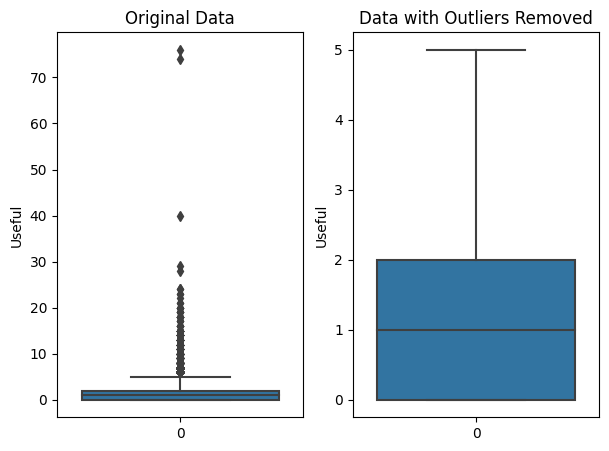

In [194]:
fig, axes = plt.subplots(1, 2, figsize=(7, 5))
sns.boxplot(data = filteredData['useful'], ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_ylabel('Useful')
sns.boxplot(data = cleanData['useful'], ax=axes[1])
axes[1].set_title('Data with Outliers Removed')
axes[1].set_ylabel('Useful')
plt.show()

distribution of the Useful column values before and after removing outliers. As shown there is a significant difference between them and there are a lot of outliers in the original data.

In [195]:
print(f"the length of data is {len(cleanData)}")

the length of data is 33564


### In general, we might remove some inactive users from a dataset , for example, users who rate businesses less than 3 times. However, in this case, we are doing the opposite and removing extremely active users who rate businesses more than 30 times (>30). Again, create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 

At last, __i print the length of the data__.

In [196]:
normActiveUsers = (cleanData['user_id'].value_counts() < 30)
normActiveUsers 

joIzw_aUiNvBTuGoytrH7g    False
uZbTb-u-GVjTa2gtQfry5g    False
_PzSNcfrCjeBxSLXRoMmgQ    False
7GC9fVWKa4a1ZmBGLH6Uww    False
3gIfcQq5KxAegwCPXc83cQ    False
                          ...  
R50WCEHhvycn6OzoEkA2Zg     True
EwmhCKLD8LVBFkeXj33KWA     True
tGBlcieUE9LpklZGylh__Q     True
pJ6jtEZZAdqR_6L5Dy3FIg     True
mlY2rj2PBhK6-nlWjDMQIg     True
Name: user_id, Length: 12864, dtype: bool

In [197]:
len(cleanData['user_id'].unique())

12864

In [198]:
cleanedData = cleanData[cleanData['user_id'].isin(normActiveUsers.index[normActiveUsers])]
len(cleanedData['user_id'].unique())

12795

In [199]:
counts = cleanedData['user_id'].value_counts()
counts = pd.DataFrame({'user':counts.index , 'count':counts.values})
counts2 = cleanData['user_id'].value_counts()
counts2 = pd.DataFrame({'user':counts2.index , 'count':counts2.values})

In [200]:
counts

,user,count
0,SGXahHRReksq3m_Zk9V20w,29
1,p7dvahRPZIWL7T6pFA_0dg,29
2,l81ILmOhky5bG7o4r3rkhQ,29
3,wLuDGMXytNVTF8ZU2gwUEQ,29
4,W_QXYA7A0IhMrvbckz7eVg,29
...,...,...
12790,JqwMCG0g2DwFEtnwVYFXSQ,1
12791,IqdFvfcjqZXuuomsyGyTsw,1
12792,d1o01mHoY7Yv5hzDZE9VBg,1
12793,DM1wEKOElT5PUQFLbLB2Tg,1


In [201]:
counts2

,user,count
0,joIzw_aUiNvBTuGoytrH7g,117
1,uZbTb-u-GVjTa2gtQfry5g,108
2,_PzSNcfrCjeBxSLXRoMmgQ,83
3,7GC9fVWKa4a1ZmBGLH6Uww,83
4,3gIfcQq5KxAegwCPXc83cQ,81
...,...,...
12859,R50WCEHhvycn6OzoEkA2Zg,1
12860,EwmhCKLD8LVBFkeXj33KWA,1
12861,tGBlcieUE9LpklZGylh__Q,1
12862,pJ6jtEZZAdqR_6L5Dy3FIg,1


In [202]:
starsOriginal = pd.Series(counts2['count'])
starsClean = pd.Series(counts['count'])

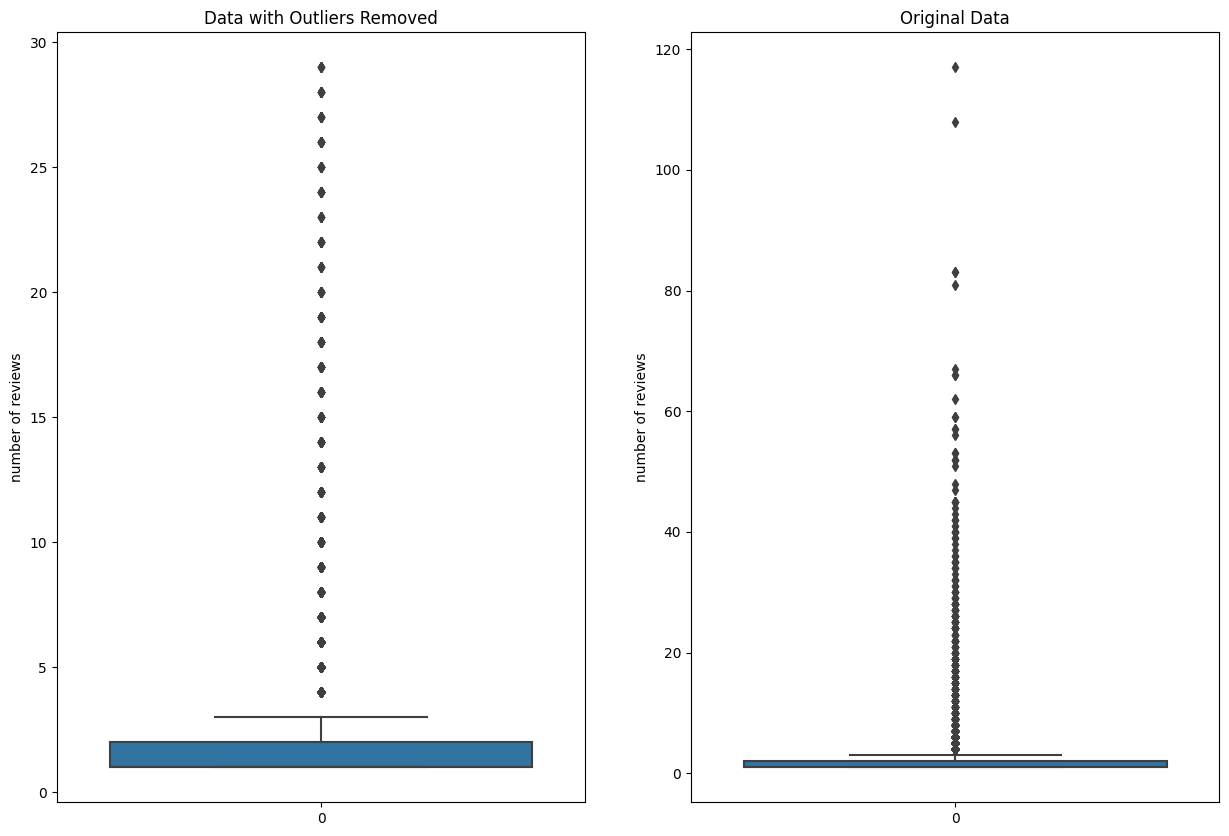

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(data=starsClean, ax=axes[0])
axes[0].set_title('Data with Outliers Removed')
axes[0].set_ylabel('number of reviews')
sns.boxplot(data=starsOriginal, ax=axes[1])
axes[1].set_title('Original Data')
axes[1].set_ylabel('number of reviews')
plt.show()

distribution of the number of the reviews given by each user before and after removing the outliers. as shown in the plots there are a number of outliers that are removed after cleaning the data but there are still few which aren't covered by the specification to remove but the number of them is negligible.

In [204]:
sampledIds = np.random.choice(counts['user'].unique(), 80)
sampledCounts = counts[counts['user'].isin(sampledIds)]
sampledIds2 = np.random.choice(counts2['user'].unique(), 80)
sampledCounts2 = counts2[counts2['user'].isin(sampledIds2)]

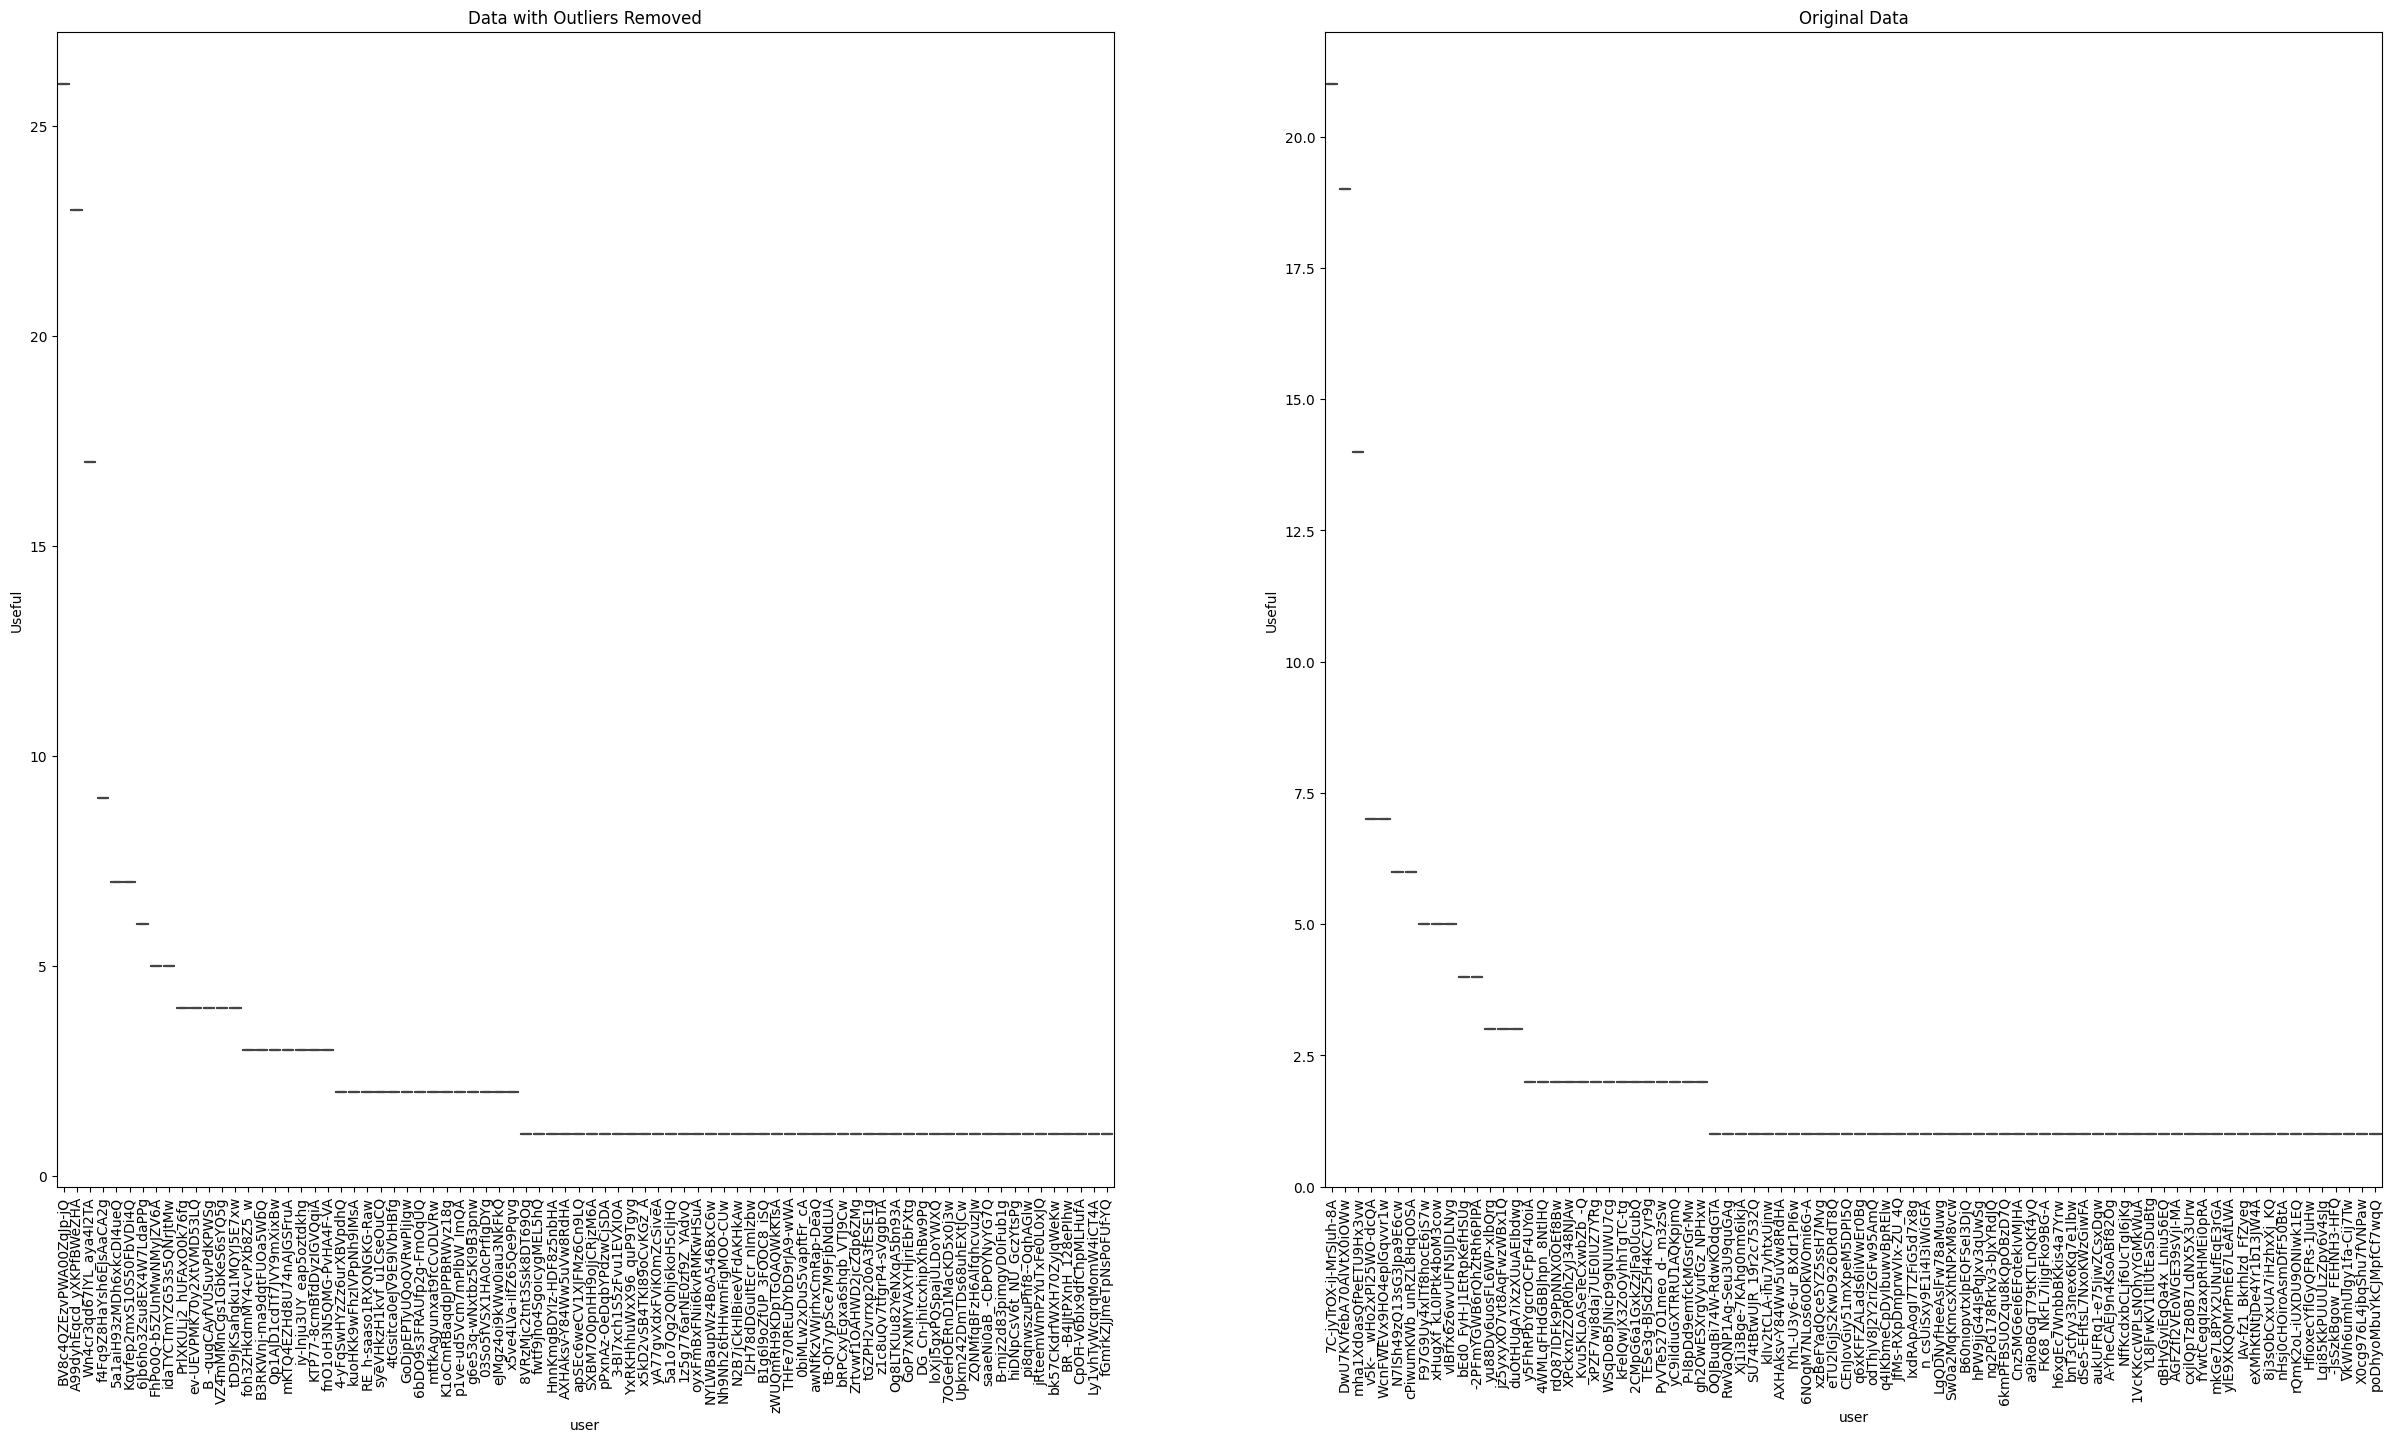

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
sns.boxplot(x='user', y='count', data=sampledCounts, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title('Data with Outliers Removed')
axes[0].set_ylabel('Useful')
sns.boxplot(x='user', y='count', data=sampledCounts2, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Original Data')
axes[1].set_ylabel('Useful')
plt.show()

In [206]:
print(f'the length of data is {len(cleanedData)}')

the length of data is 30402


# Training a LinearRegression model on the data output from Q2.2.

###  How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [207]:
cleanedData

,business_categories,business_city,business_id,date,stars,text,useful,user_id
0,Restaurants,Tempe,6oRAC4uyJCsJl1X0WZpVSA,14/6/2012,4,love the gyro plate. Rice is so good and I als...,1,0hT2KtfLiobPvh6cDC8JQg
2,Automotive,Glendale,rxQ2PIjhAx6dgAqUalf99Q,9/9/2012,5,Never having dealt with a Discount Tire in Pho...,0,HLbhD2OyiMCUDRR4c1iXaw
3,Restaurants,Tempe,EC9WB-iVjd28B6R6KIZ8TA,4/8/2010,4,Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...,0,jdoGEEy5s-5L1O_lNzEi2g
4,Cinema,Tempe,LDJhwZN14AZOJyHjg2lkRw,13/12/2011,4,We got passes for the preview of Mission Impos...,0,Mb0psF4WQF7gZSuZafVr-g
5,Tea,Tempe,o5x6DF0KK1OBsiUOx2gavg,4/2/2010,4,"This would most certainly be ""my"" coffee shop ...",0,xw77viWz_BbmyntxoBVH4A
...,...,...,...,...,...,...,...,...
38647,Tea,Tempe,lktu5JPDlQUG-7cV7gOzDQ,12/8/2011,5,Always amazing,0,ayKW9eWwGFcrtJaHcwZUCw
38648,Restaurants,Tempe,rwQIBAM_kHtVl1Ks8Flexw,28/8/2010,1,We used the Restaurant.com $25 off of $35 or m...,0,KucBnMrhalzxnD9AWrxwYQ
38649,Restaurants,Glendale,sbnCG3-CouwIu0jsApfCsQ,26/2/2010,1,We ate at the Arrowhead Mall Johnny Rockets to...,0,mlY2rj2PBhK6-nlWjDMQIg
38652,Restaurants,Tempe,vnffHkFJbmd-J3OaBbK2Eg,14/4/2011,2,I really wanted to like this place because it'...,0,6e7pZofhDuIlD_rX2oYirQ


In [208]:
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()

In [209]:
train, test = train_test_split(cleanedData, train_size=0.7, random_state=42)
print(train.shape)
print(test.shape)
X_train = train[['useful']]
y_train = train['stars']
X_test = test[['useful']]
y_test = test['stars']

(21281, 8)
(9121, 8)


In [210]:
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
print("y = x *", reg.coef_, "+", reg.intercept_)
mse = mean_squared_error(np.array(y_test), predicted)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

y = x * [-0.07001202] + 3.7969310722157843
MSE: 1.519529373379641
R Squared: 0.007335814962269316


### Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [211]:
reviewCounts = cleanedData['business_id'].value_counts().rename_axis('business_id').reset_index(name='business_review_count')
groupedData = cleanedData.groupby('business_id')['stars'].agg(['mean'])
groupedData.columns = ['stars']

In [212]:
reviewCounts

,business_id,business_review_count
0,JokKtdXU7zXHcr20Lrk29A,671
1,WNy1uzcmm_UHmTyR--o5IA,513
2,c1yGkETheht_1vjda7G5sA,429
3,2ceeU8e3nZjaPfGmLwh4kg,274
4,YQvg0JCGRFUkb6reMMf3Iw,270
...,...,...
1568,wQIilAU2CJG4XNG3b52_IQ,1
1569,Nc8BKRECkNItZBJIku5G4w,1
1570,1lPG5M2N8wWNJMrricrbIw,1
1571,RDYOZGZ2DTor_jAOy9FwGw,1


In [213]:
groupedData

,stars
business_id,
-4QayefhaPXm6wPp-Zpb0A,4.333333
-6yIYUuwYcZnClI_8_ojVg,2.666667
-92fePI5W6MwOaxMxphFjA,3.800000
0-A_cxbEmlkkq0362cvi3A,4.250000
01cQQpeEwWpzTgv6YUQhAQ,4.666667
...,...
zonV2F6YNVn2_sI5dK82eg,4.526316
zrO-RPR3fSdA7sI-IRGWIQ,3.666667
zsDUCO_ACzi1bGqsoiSjww,2.666667


In [214]:
mergedData = pd.merge(groupedData, reviewCounts, on='business_id')

In [215]:
mergedData

,business_id,stars,business_review_count
0,-4QayefhaPXm6wPp-Zpb0A,4.333333,3
1,-6yIYUuwYcZnClI_8_ojVg,2.666667,3
2,-92fePI5W6MwOaxMxphFjA,3.800000,5
3,0-A_cxbEmlkkq0362cvi3A,4.250000,4
4,01cQQpeEwWpzTgv6YUQhAQ,4.666667,3
...,...,...,...
1568,zonV2F6YNVn2_sI5dK82eg,4.526316,38
1569,zrO-RPR3fSdA7sI-IRGWIQ,3.666667,6
1570,zsDUCO_ACzi1bGqsoiSjww,2.666667,3
1571,zwToyWL4dT1clsFPK9wI2w,3.609375,64


In [216]:
train, test = train_test_split(mergedData, train_size=0.7, random_state=42)
print(train.shape)
print(test.shape)
X_train = train[['business_review_count']]
y_train = train['stars']
X_test = test[['business_review_count']]
y_test = test['stars']

(1101, 3)
(472, 3)


In [217]:
reg.fit(X_train, y_train)
predicted = reg.predict(X_test)
print("y = x *", reg.coef_, "+", reg.intercept_)
mse = mean_squared_error(np.array(y_test), predicted)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2)

y = x * [0.00190531] + 3.512407087227335
MSE: 0.7505848613202969
R Squared: 0.007719250045890802


 ### The correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

correlation between business_review_count and stars

In [218]:
mergedData[['business_review_count','stars']].corr()

,business_review_count,stars
business_review_count,1.000000,0.095354
stars,0.095354,1.000000


correlation between useful and stars

In [219]:
cleanedData[['useful','stars']].corr()

,useful,stars
useful,1.000000,-0.072603
stars,-0.072603,1.000000


the value of correlation between business_review_count or useful and stars is so little that it can't be considered as a good measurement for calculating the relationship between these values.

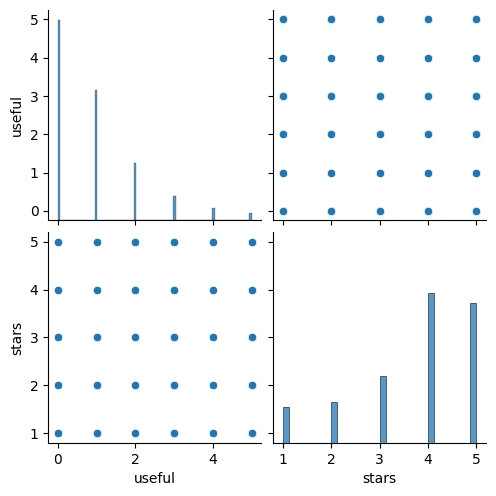

In [220]:
sns.pairplot(cleanedData[['useful','stars']])

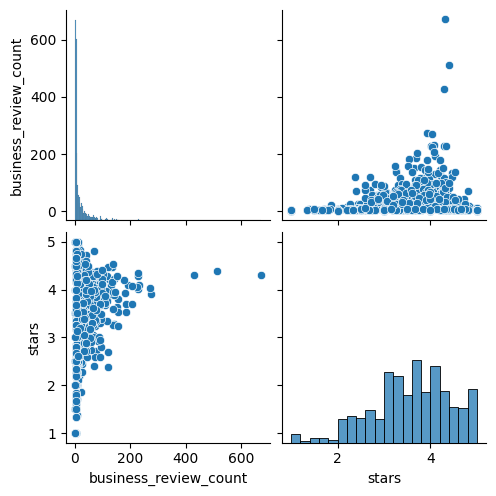

In [221]:
sns.pairplot(mergedData[['business_review_count','stars']])

my understanding of these plots and correlation is that there is no cause and effect relationship and correlation between either useful and stars or count of reviews and stars. as it is shown in the scatter plots and bar charts all the values of stars are randomly and almost evenly distributed. all these show that there is meaningful correlation between the count of reviews or useful and stars.